In [1]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import time
import os 
import numpy as np

In [7]:
matrix_1 = np.array([[3, 2],[1, 5]])
np.linalg.inv(matrix_1)

array([[ 0.38461538, -0.15384615],
       [-0.07692308,  0.23076923]])

In [10]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.metrics import r2_score

In [11]:
x = np.arange(-10, 10, 0.1)
eq1 = 4*x + 3
eq2 = 3*x + 1
eq3 = 2*x + 5

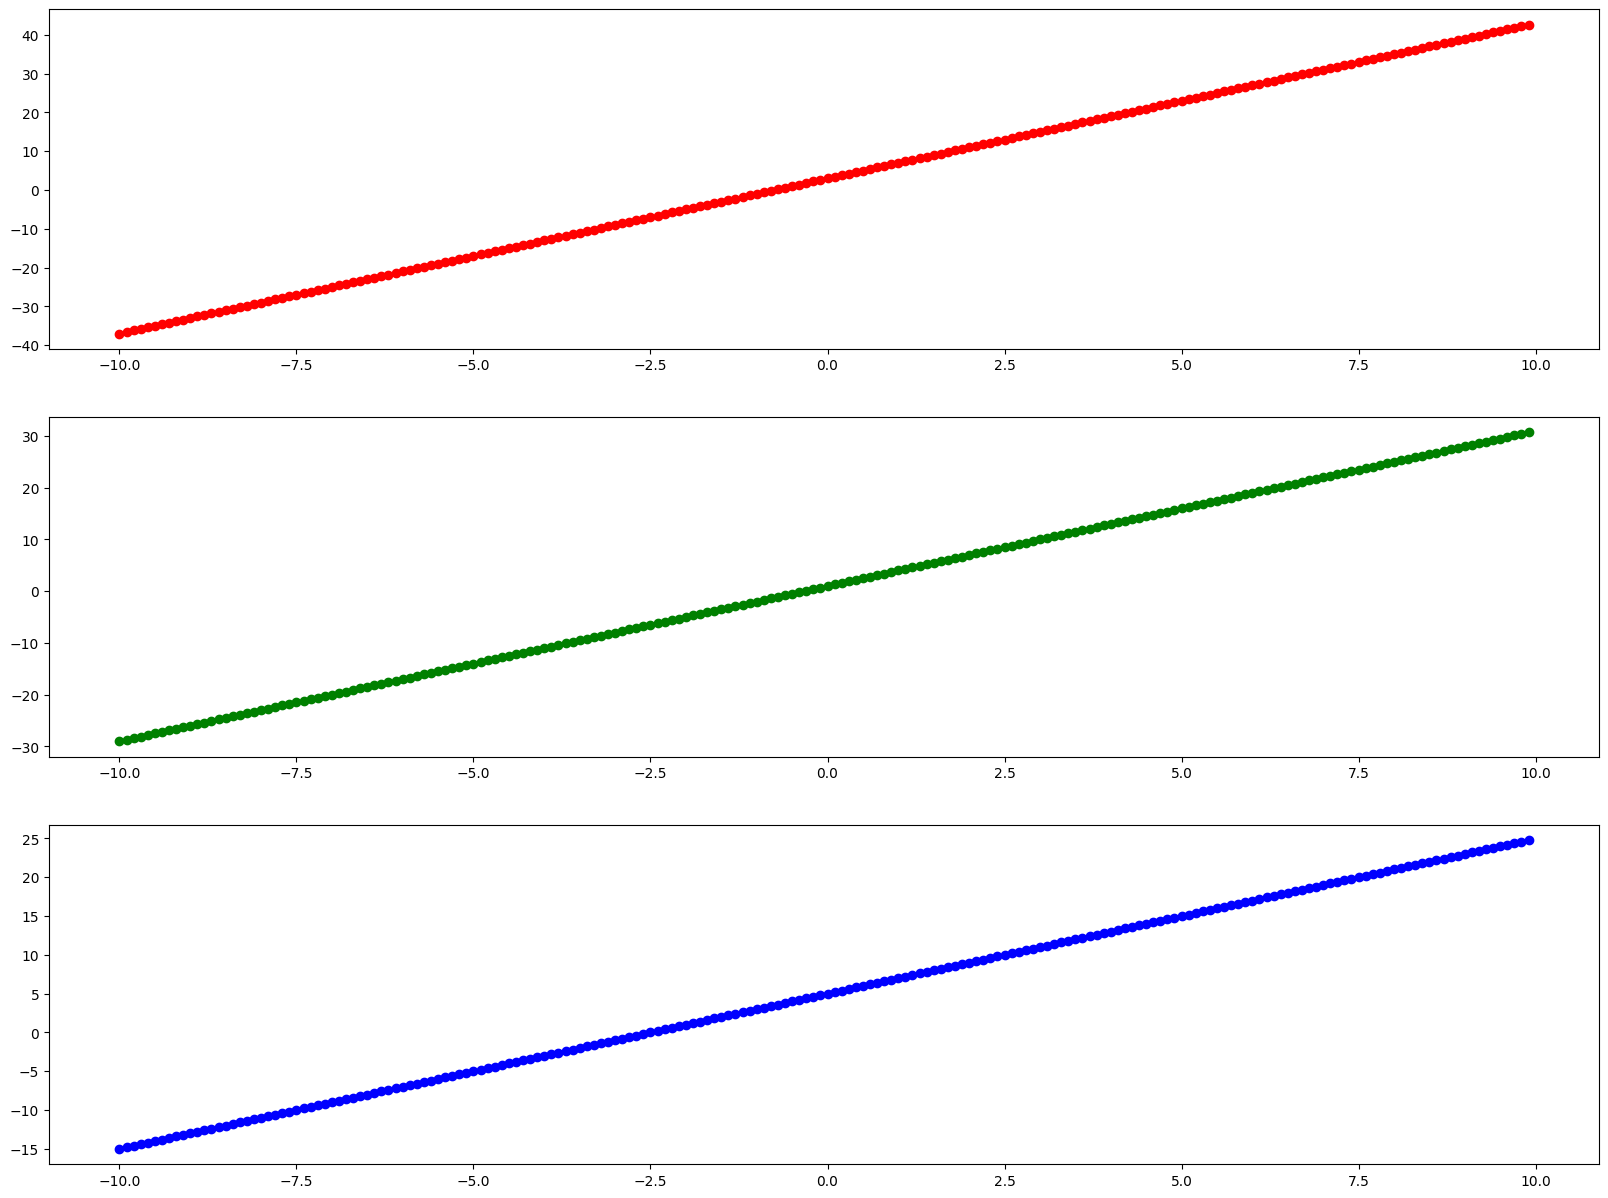

In [23]:
fig = plt.figure(figsize=(20, 15))
ax = fig.subplots(3, 1)
ax[0].scatter(x, eq1, color='red')
ax[1].scatter(x, eq2, color='green')
ax[2].scatter(x, eq3, color='blue')

In [24]:
matrix_a = np.array([[3, 7], [4, 9]])
matrix_b = np.array([[6, 2], [5, 8]])
matrix_c = matrix_a*matrix_b
matrix_c

array([[18, 14],
       [20, 72]])

In [3]:
mp_holistic = mp.solutions.holistic
mp_draw = mp.solutions.drawing_utils

In [4]:
def Media_Pipe_Detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
    image.flags.writeable = False
    result = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, result

In [5]:
def draw_keypoints(result, image):

    mp_draw.draw_landmarks(image, result.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1))
    
    mp_draw.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4))

    mp_draw.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=4))

    mp_draw.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1),
                           mp_draw.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1))

In [6]:
def collect_keypoints(result):
    face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(1404)
    right_hand = np.array([[res.x, res.y, res.z] for res in  result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(63)
    left_hand = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(63)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(132)
    return np.concatenate([face, right_hand, left_hand, pose])

In [7]:
classes = np.array(['Pap'])
sequences = 30
sequence_length = 30
Data_Folder = os.path.join('DATA')

In [8]:
#Last Collected 29
sequence_start = 350
sequence_end = 400


for action in classes:
    for sequence in range(sequence_start, sequence_end):
        try:
            os.makedirs(os.path.join('DATA', action, str(sequence)))
        except:
            pass


In [21]:
capture = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in classes:
        # Loop through sequences aka videos
        for sequence in range(sequence_start, sequence_end):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = capture.read()

                # Make detections
                image, result = Media_Pipe_Detection(frame, holistic)


                # Draw landmarks
                draw_keypoints(result, image)
        
                if frame_num == 0: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('Cam Feed', image)
                    cv2.waitKey(2000)
                    
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Cam Feed', image)

                keypoints = collect_keypoints(result)
                numpy_path = os.path.join(Data_Folder, action, str(sequence), str(frame_num))
                np.save(numpy_path, keypoints)

                cv2.imshow('Cam Feed', image)
                
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    capture.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [18]:
capture.release()
cv2.destroyAllWindows()

In [ ]:
capture = cv2.VideoCapture(0)
while capture:

    ret, frame = capture.read()

    cv2.imshow('Cam Feed', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()